In [6]:
import math
import os
import sys
import argparse

import pandas as pd
import numpy as np

sys.path.append('../..')

from src.IO.IO import IO
from src.util import get_config

%matplotlib inline
import matplotlib.pyplot as plt
from src.prg.prg.prg import create_prg_curve, plot_prg, calc_auprg, plot_pr
plt.rcParams['figure.figsize'] = (8,7)

In [7]:
# absolute path to the config folder
path = "../../src/config_files/"
cfg_filename = "config_lbds.yaml"
fn = path + '/' + cfg_filename
if os.path.exists(fn):
    cfg = get_config(fn)
else:
    print("Config file {} couldn't be found at {}, exiting".format(args.configfn, fn))
    exit()

Reading config file


In [8]:
import util

io = IO(cfg, 'pipeline')
ad = cfg["pipeline"]["anomaly_detection"]["anomaly_detector"]
machine = cfg["machine"]
amount_of_exp = 20
nb_runs = [4*(i+1) for i in range(amount_of_exp)]
add_low_nb_runs = True
if add_low_nb_runs:
    nb_runs = [i+1 for i in range(20)] + [4*(i+6) for i in range(amount_of_exp)]

# get filenames
stats_path = util.RESULTS_DIR + "/statistics/multiple_pipelines/{}/{}/{}/".format(ad, io.machine.lower(), io.start_year)

statistics_dfs = {}
for nbr in nb_runs:
    fn = io.get_multiple_pipeline_statistics_filename(nbr, ad)
    statistics_dfs[nbr] = io.read_csv(fn, stats_path)

"""
for i, stats_csv in enumerate(stats_csvs):
    pipelines = []
    for i in range(stats_csv.shape[0]):
        pipelines.append({'auc': stats_csv['auc'][i],
                          'rank': stats_csv['rank'][i],
                          'auprg': stats_csv['auprg'][i],
                          'practical_recall': stats_csv['practical_recall'][i]})
    plot_data.append(pipelines)
"""
print(len(statistics_dfs))

Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_1_iforest_res-practical_recall-test.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_2_iforest_res-practical_recall-test.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_3_iforest_res-practical_recall-test.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_4_iforest_res-practical_recall-test.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_5_iforest_res-practical_recall-test.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_6_iforest_res-practical_recall-test.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_7_iforest_res-practical_recall-test.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_8_iforest_res-practical_recall-test.csv file
Reading grid_search_statistics_multiple_pipelines_lbds_2016_B2_9_iforest_res-practical_recall-test.csv file
Reading grid_search_statisti

Saving figure at /home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/LBDS/../../src/IO/../../results/experiments/figures/iforest/2016/01-01/B2/
Saving figure at /home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/LBDS/../../src/IO/../../results/experiments/figures/iforest/2016/01-01/B2/
Saving figure at /home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/LBDS/../../src/IO/../../results/experiments/figures/iforest/2016/01-01/B2/
Saving figure at /home/thomas/Documents/git/anomaly-detection-abt-equipment/notebooks/LBDS/../../src/IO/../../results/experiments/figures/iforest/2016/01-01/B2/


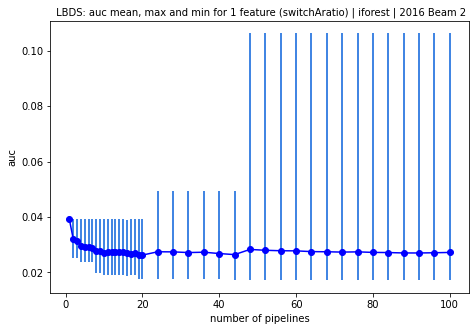

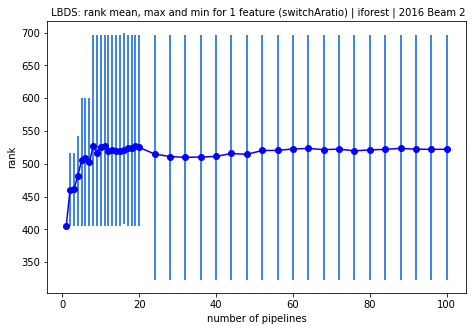

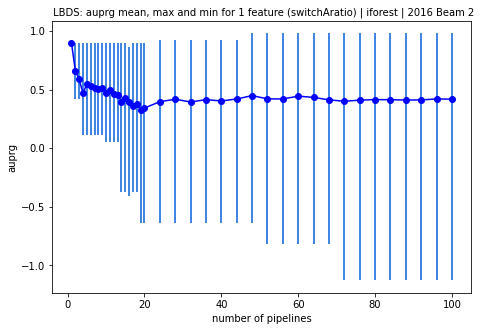

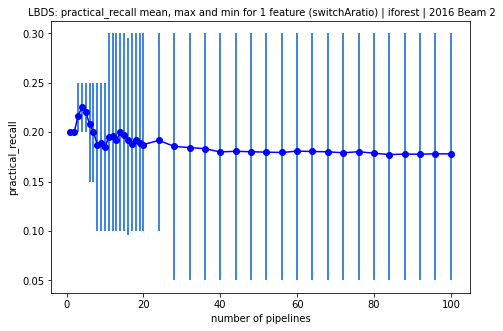

In [11]:
dfs_to_plot = ['auc', 'rank', 'auprg', 'practical_recall']

data = {t: {'x': [], 'y': [], 'err_min': [], 'err_max': []} for t in dfs_to_plot}
# means
for t in dfs_to_plot:
    for experiment_name, stats_df in statistics_dfs.items():
        data[t]['x'].append(experiment_name)
        data[t]['y'].append(stats_df[t].mean())
        data[t]['err_min'].append(stats_df[t].mean() - stats_df[t].min())
        data[t]['err_max'].append(stats_df[t].max() - stats_df[t].mean())
# plot statistics
#threshold = cfg["pipeline"]["anomaly_detection"][ad]["threshold"]

#plot
save_figures = True
colors = ['b-o']
e_colors = ["#045EDB"]

for i, type in enumerate(dfs_to_plot):
    plt.figure(figsize=(7.5, 5))
    data[type]['y'][15] = (data[type]['y'][14] + data[type]['y'][16]) / 2
    data[type]['err_min'][15] = data[type]['err_min'][14]
    data[type]['err_max'][15] = data[type]['err_max'][14]
    plt.errorbar(data[type]['x'], data[type]['y'], yerr=[data[type]['err_min'], data[type]['err_max']],
                 ecolor=e_colors[0],
                 fmt=colors[0])
    plt.title(
        " {}: {} mean, max and min for 1 feature (switchAratio) | {} | {} Beam {}".format(machine, type, ad, io.start_year, io.beam),
        fontsize=10)
    plt.xlabel("number of pipelines")
    plt.ylabel(type)
    if save_figures:
        prefix = "{}_{} convergence multiple pipelines".format(machine, type)
        filename = '{}_{}.png'.format(prefix, ad)
        fig_path = io.get_figures_path(ad)
        io.save_figure(plt, fig_path, filename)
plt.show()